In [202]:
# The following is necessary to run the cells that follow. Run this cell once at the beginning
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../")
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [203]:
                        # Fill in the following 3 variables
################################################################################################
files = ["../../datasets/long/ZGC_long.log", "../../datasets/long/ShenandoahGC_long.log", "../../datasets/long/ParallelGC_long.log", "../../datasets/long/G1GC_long.log"]
labels = ["ZGC Short", "Shenandoah Short", "ParallelGC", "G1GC"]
# time_range_seconds = [0, 100]
time_range_seconds = None  # includes full log
################################################################################################
from src.compare_logs import get_parsed_comparions_from_files 
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds)

## How to use filter_by and group_by

> ### `filter_by` : list of tuples -> (col, val), where column is a column in the gc_event_dataframe, and val is the EXACT value each row must match to remain in the dataset. Setting val = None means ANY non "None" value will remain in the dataset. 
> Example: `filter_by = [("EventType", "Pause")]` #     Only looks at rows that represent a Pause

> Example: `filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]` # Only looks at rows that include allocation for both Before & After gc

<br />

> ### `group_by` string, representing a column in the gc_event_dataframe. For each unique value in each log, a new group is created and independently plotted. leaving group_by = None means all data after filters shall be a group
> Example: `group_by "EventName"` 

## Compare STW pauses during runtime

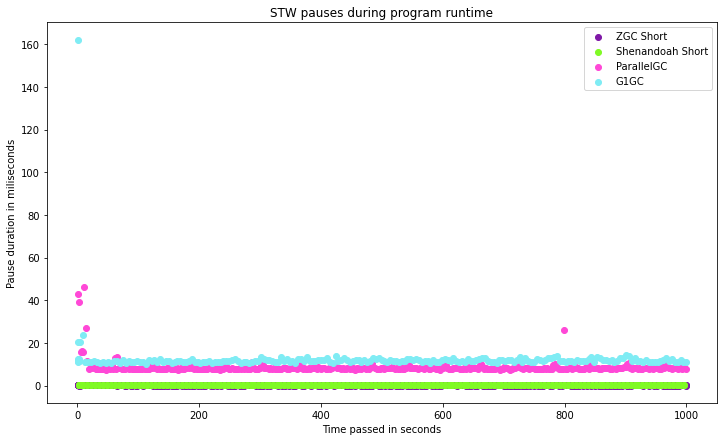

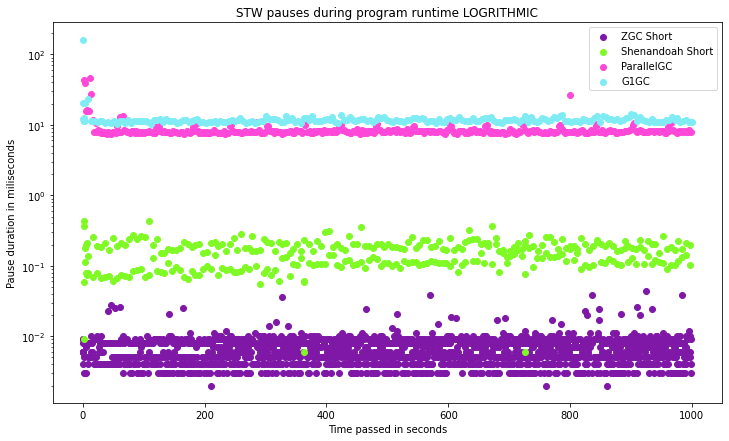

In [204]:
from new_graphing import plot_scatter

# Chart #1, linear Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = [("EventType", "Pause")], labels=labels)
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")

############################################################################################################

# Chart #2, logritmic Y axis
plot = plot_scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels = labels)
plot.set_yscale("log") # LOGRITHMIC
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
_ = plot.set_ylabel("Pause duration in miliseconds")

## Concurrent durations during runtime

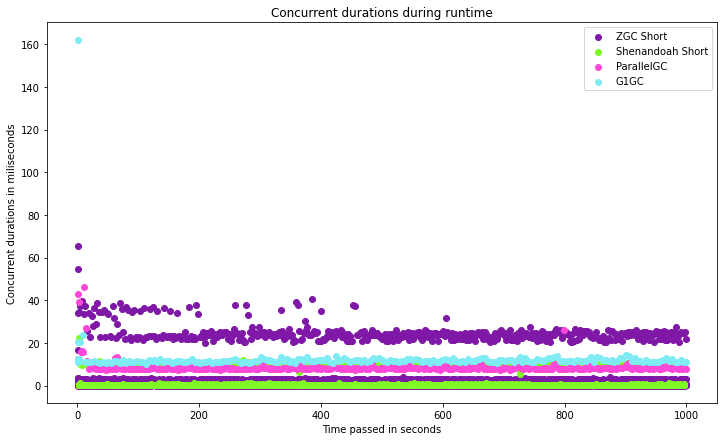

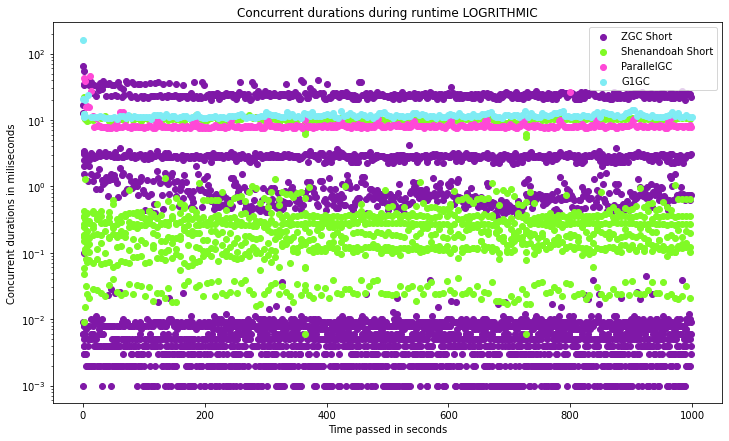

In [205]:
from new_graphing import plot_scatter
# Linear graph
plot = plot_scatter(gc_event_dataframes, labels=labels)
_ = plot.set_title("Concurrent durations during runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Concurrent durations in miliseconds")

# Logrithmic plot
plot = plot_scatter(gc_event_dataframes, labels=labels)
plot.set_yscale("log") # LOGRITHMIC
_ = plot.set_title("Concurrent durations during runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
_ = plot.set_ylabel("Concurrent durations in miliseconds")

## Time spent in STW vs. Concurrent

['ZGC Short', 'Shenandoah Short', 'ParallelGC', 'G1GC']


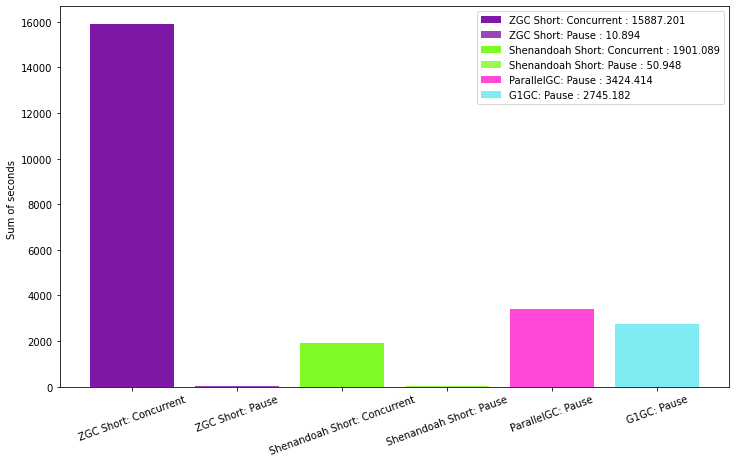

In [206]:
from new_graphing import plot_bar_sum
print(labels)
plot = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = [("Duration_miliseconds", None)], labels= labels)
_ = plot.set_title = "Sum of event durations in miliseconds"
_ = plot.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 20)


## Comparing Trends within the data

In [207]:
from new_graphing import plot_trends
print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels,
       throughput=True)
print("\n\n\n")

print("\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------------
ZGC Short               | 1689         | 0.044        | 10.894       | 0.0064       | 0.0034       | 100.0%       | 
Shenandoah Short        | 326          | 0.431        | 50.948       | 0.1563       | 0.0653       | 99.99%       | 
ParallelGC              | 399          | 46.344       | 3424.414     | 8.5825       | 3.3959       | 99.66%       | 
G1GC                    | 220          | 162.18       | 2745.182     | 12.4781      | 10.2058      | 99.73%       | 




			Pauses by name during runtime
------------------------------------------------------------------------------------------------------------------
 Trends 

## Percentiles of event durations

In [208]:
from new_graphing import plot_percentiles
print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels)

print("\n\n")

print("\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)

# TODO: fix the printing of the second table's TITLES

			Pauses during runtime
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ZGC Short  | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.02 ms   | 0.04 ms   | 0.04 ms   | 
Shenandoah | 0.16 ms   | 0.2 ms    | 0.24 ms   | 0.26 ms   | 0.36 ms   | 0.43 ms   | 0.43 ms   | 
ParallelGC | 8.01 ms   | 8.23 ms   | 9.34 ms   | 10.04 ms  | 26.12 ms  | 44.94 ms  | 46.2 ms   | 
G1GC       | 11.52 ms  | 12.04 ms  | 12.87 ms  | 13.31 ms  | 20.31 ms  | 131.83 ms | 159.14 ms | 



			Pauses during runtime by name
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
----------------------------------------------------------------------------------------

## Mean durations in miliseconds, pauses

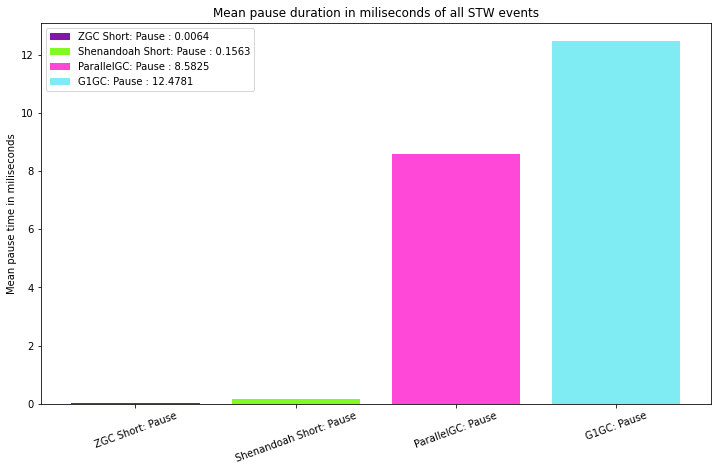

In [209]:

from new_graphing import plot_bar_avg

plot = plot_bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = [("EventType", "Pause")], labels = labels)
_ = plot.set_title("Mean pause duration in miliseconds of all STW events")
_ = plot.set_ylabel("Mean pause time in miliseconds")
_ = plt.xticks(rotation = 20)


## Heap allocation used before & after GC

['ZGC Short', 'Shenandoah Short', 'ParallelGC', 'G1GC']


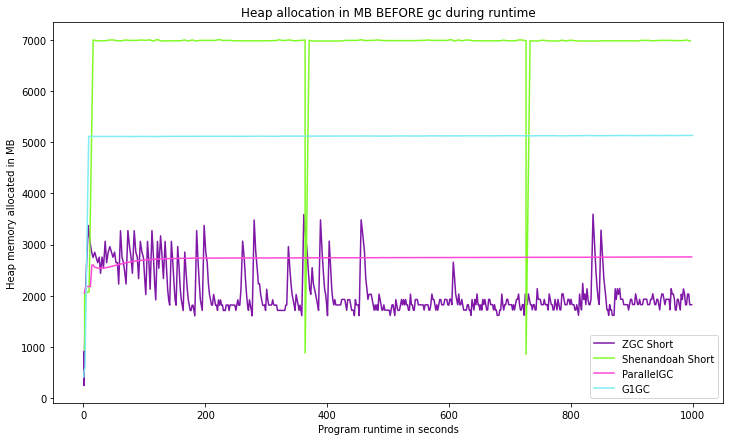

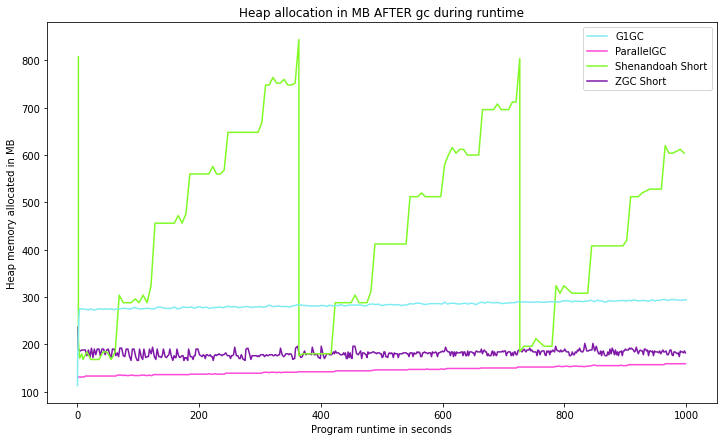

In [210]:
from new_graphing import plot_line
print(labels)

plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapBeforeGC", None)],
            labels = labels,
            #labels = [label + " Before GC" for label in labels], 
            column = "HeapBeforeGC")
_ = plot.set_title("Heap allocation in MB BEFORE gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")


plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapAfterGC", None)],
            labels = labels,
           # labels = [label + " After GC" for label in labels], 
            column = "HeapAfterGC")

_ = plot.set_title("Heap allocation in MB AFTER gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")

handles, labels = plot.get_legend_handles_labels()

# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plot.legend(handles, labels)

## MB reclaimed during GC during runtime

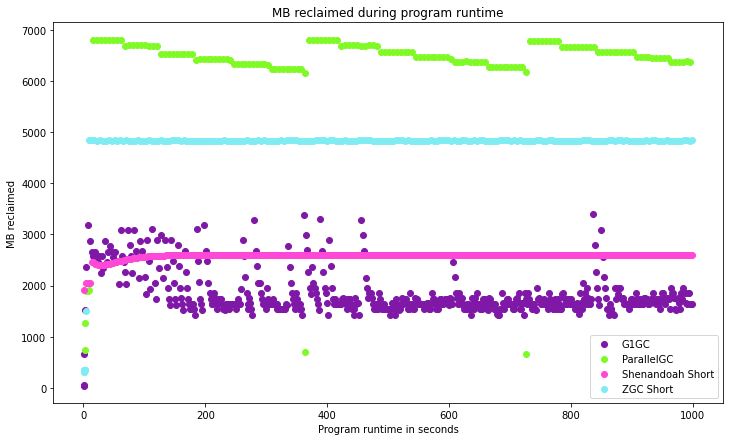

In [211]:
from new_graphing import plot_reclaimed_bytes
filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None) ]
plot = plot_reclaimed_bytes(gc_event_dataframes, filter_by = filter_by, labels = labels)
_ = plot.set_title("MB reclaimed during program runtime")
_ = plot.set_ylabel("MB reclaimed")
_ = plot.set_xlabel("Program runtime in seconds")


## Heatmaps for each log

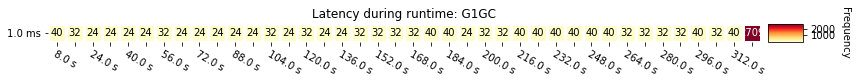

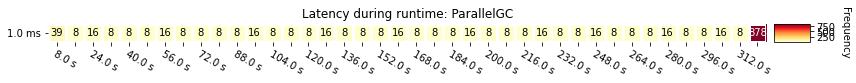

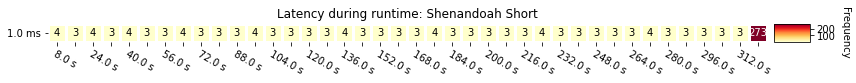

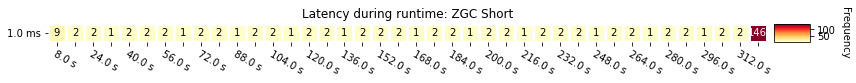

In [212]:
from src.graphing.heatmap import plot_heatmap
import src.transform as transform
plt.rcParams["figure.figsize"] = [12, 7]
for label, gc_event_dataframe in zip(labels, gc_event_dataframes):
    heatmap, dimensions = transform.get_heatmap_data(gc_event_dataframe, 40,1,8,1, True)# Set true to false 
    #heatmap, dimensions = transform.get_heatmap_data(gc_event_dataframe, y_dim = [10, 10], y_scale = "log", True) # Set true to false  # TODO

#plot_heatmap(heatmap, dimensions, True)
    plot = plot_heatmap(heatmap, dimensions, True)
    plot.set_title("Latency during runtime: " +  label)
plt.rcParams["figure.figsize"] = [12, 7]